# Interact with MongoDB

## Dependency

In [15]:
from pymongo import MongoClient
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import pprint
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

## Parameter

In [4]:
USERNAME = ''
PASSWORD = ''
CLUSTER = ''
DATABASE = ''
COLLECTION = ''

## Connect to MongoDB

In [5]:
url = f'mongodb+srv://{USERNAME}:{PASSWORD}@{CLUSTER}/?retryWrites=true&w=majority'
mongo_client = MongoClient(url, tlsCAFile=certifi.where())
db = mongo_client[DATABASE]
collection = db[COLLECTION]

## Get data from MongoDB

In [20]:
query = {
    'item': 'transportation'
}
data = []
for doc in collection.find(query).sort('date', 1):
    data.append(doc)

## Make DataFrame

In [36]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = [f'{y}0{m}' if m < 10 else f'{y}{m}' for y, m in zip(df['year'], df['month'])]

In [37]:
df.shape

(47, 12)

In [38]:
df.dtypes

_id                      object
date             datetime64[ns]
item                     object
type                     object
amount                  float64
place                    object
memo                     object
creation_time    datetime64[ns]
last_modified    datetime64[ns]
year                      int64
month                     int64
year_month               object
dtype: object

## Analysis

In [49]:
df.place.unique()

array(['rtd', 'united airlines', 'edreams', 'frontier airlines',
       'caltrain', 'san francisco international airport station',
       'mta nyc transit', 'uber', 'redwood city station', 'zipcar'],
      dtype=object)

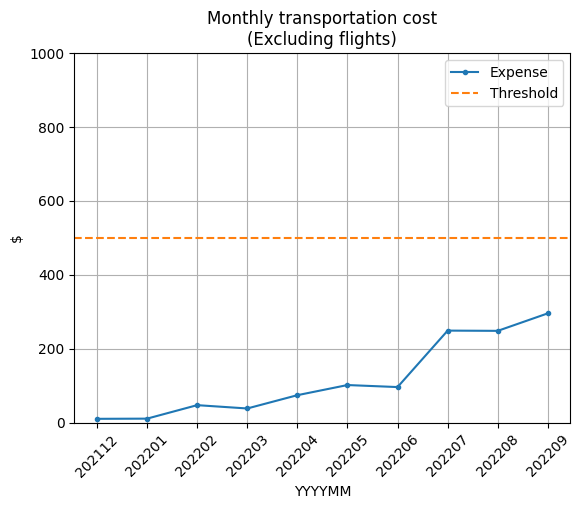

In [58]:
df_tmp = df.copy()

df_tmp = df_tmp.loc[~df_tmp['place'].isin(['united airlines', 'edreams', 'frontier airlines'])]

cost = df_tmp.groupby([df_tmp['year_month']]).sum()

plt.plot(cost.index, cost['amount'], marker='.', label='Expense')
plt.axhline(y=500, label='Threshold', linestyle='--', color='tab:orange')
plt.title('Monthly transportation cost\n(Excluding flights)')
plt.ylabel('$')
plt.xlabel('YYYYMM')
plt.xticks(rotation=45)
plt.ylim(0, 1000)
plt.legend()
plt.grid()
plt.show()